**Exercise 1**

Part 1: (*a*, *a*) &rarr; (*a*, -*a*) &rarr; (-*a*, -*a*) &rarr; (-*a*, *a*) &rarr; (*a*, *a*) <br>
Part 2: (1 - *a*, *a* - 1) &rarr; (-*a*/4, *a* - 1) &rarr; (-*a*/4, *a*/2) &rarr; (1 - *a*, *a*/2) &rarr; (1 - *a*, *a* - 1) <br>
Part 3: (*a*/4, *a* - 1) &rarr; (*a* - 1, *a*/2), then (*a* - 1, *a* - 1) &rarr; (*a*/4, *a*/2) <br>
Part 4: (*a* - 1, -*a*/4) &rarr; (*a* - 1, -*a*/2) &rarr; (1 - *a*, -*a*/2) &rarr; (1 - *a*, -*a*/4) <br>

To plot the points show above, I will store the x-components and y-components in seperate arrays per part. This is since the method *matplotlib.pyplot.plot(array1, array2)* takes an array of x-components and an array of y-components as parameters. For Part 3, since not all the points are connected, I will split the part into two sections, 3a and 3b, so that each can be plotted separately.

Points before transformation: 
[(4, 4), (4, -4), (-4, -4), (-4, 4), (4, 4)]
[(-3, 3), (-1.0, 3), (-1.0, 2.0), (-3, 2.0), (-3, 3)]
[(1.0, 3), (3, 2.0)]
[(3, 3), (1.0, 2.0)]
[(3, -1.0), (3, -2.0), (-3, -2.0), (-3, -1.0)]
---
Points after transformation: 
[(5.333333333333333, 0.0), (2.666666666666667, -2.6666666666666665), (-5.333333333333333, 0.0), (-2.666666666666667, 2.6666666666666665), (5.333333333333333, 0.0)]
[(-2.0, 2.0), (0.0, 1.3333333333333333), (-0.33333333333333337, 1.0), (-2.3333333333333335, 1.6666666666666665), (-2.0, 2.0)]
[(2.0, 0.6666666666666667), (3.6666666666666665, -0.3333333333333333)]
[(4.0, 5.551115123125783e-17), (1.6666666666666665, 0.3333333333333333)]
[(2.6666666666666665, -1.3333333333333333), (2.3333333333333335, -1.6666666666666665), (-3.6666666666666665, 0.3333333333333333), (-3.3333333333333335, 0.6666666666666666)]
---
Plotted points before and after transformation: 


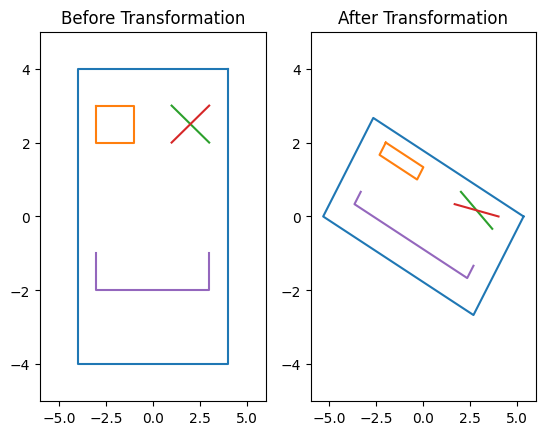

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 4
b = 3

parts = np.asarray([
    [[a, a, -a, -a, a], [a, -a, -a, a, a]], #part 1 (x's and y's)
    [[1 - a, -a / 4, -a / 4, 1 - a, 1- a], [a - 1, a - 1, a / 2, a / 2, a - 1]], #part 2 (x's and y's)
    [[a / 4, a - 1], [a - 1, a / 2]], #part 3a (x's and y's)
    [[a - 1, a / 4], [a - 1, a / 2]], #part 3b (x's and y's)
    [[a - 1, a - 1, 1 - a, 1 - a], [-a / 4, -a / 2, -a / 2, -a / 4]] #part 4 (x's and y's)
], dtype=object)

#plot each part on the first subplot
for x in parts:
    plt.subplot(1, 2, 1)
    plt.plot(x[0], x[1])
plt.xlim([-a - 2, a + 2])
plt.ylim([-a - 1, a + 1])
plt.title("Before Transformation")

#transformation matrix
matrix = np.asmatrix([
    [1, 1 / b],
    [-1 / b, 1 / b]
])

#array to contain parts after points are transformed
newParts = np.empty(np.shape(parts), dtype=object)

partCount = 0
for part in parts:
    points = list(zip(part[0], part[1])) #combine x and y components to create a list of points
    newPoints = []
    #complete the matrix multiplication for each point
    for point in points:
        point = np.asarray(point)
        newPoint = np.asarray(list(np.dot(matrix, point)))
        newPoints.append(newPoint[0][0])
    xComponents = list(zip(*newPoints))[0]
    yComponents = list(zip(*newPoints))[1]

    #store the transformed points (split into x and y components) into new array
    newParts[partCount, 0] = xComponents
    newParts[partCount, 1] = yComponents

    partCount += 1

print("Points before transformation: ")
for i in parts:
    print(list(zip(i[0], i[1])))
print("---")

print("Points after transformation: ")
for j in newParts:
    print(list(zip(j[0], j[1])))
print("---")

print("Plotted points before and after transformation: ")
for y in newParts:
    plt.subplot(1, 2, 2)
    plt.plot(y[0], y[1])
plt.xlim([-a - 2, a + 2])
plt.ylim([-a - 1, a + 1])
plt.title("After Transformation")
plt.show()

**Exercise 2**

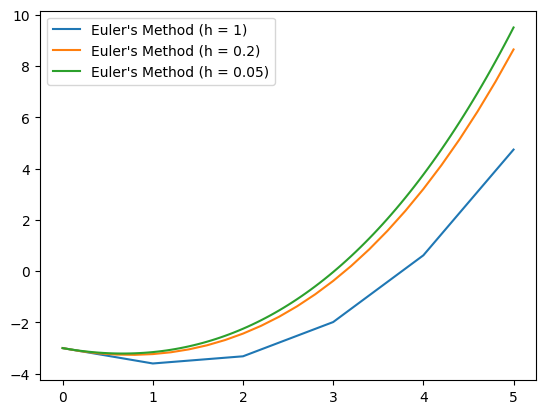

In [28]:
import numpy as np
import matplotlib.pyplot as plt

interval = [0, 5] #interval of x values
y0 = -3 #starting y value
x0 = 0 #starting x value

def eulers(stepSize):
    x = x0
    y = y0
    xComponents = [x]
    yComponents = [y]
    while x < interval[1]:
        x = float(format(x, ".2f")) #round x to two decimal points
        y = y + stepSize*(x + y/5) #newY = oldY + h*f(oldX, oldY) - Euler's method
        yComponents.append(y)
        x += stepSize #increment x by step size
        xComponents.append(x)
    plt.plot(xComponents, yComponents, label="Euler's Method (h = " + str(stepSize) + ")")

def integratingFactor():
    pass

eulers(1)
eulers(0.2)
eulers(0.05)

integratingFactor()

plt.legend()
plt.show()